Target -  

*   Number of citations

Input features - Keywords

*   Keywords(Index, Author)
*   Quartile
*   H-index
*   Impact Factor
*   Number of Authors
*   Abstract Title
*   Open Access





                

In [ ]:
# @title
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      rule.style.color = 'darkblue'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
print("Hello in ")
print("...in larger font ")

<IPython.core.display.Javascript object>

Hello in 
...in larger font 


# Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

<IPython.core.display.Javascript object>

Mounted at /content/drive/


# Section 1 Analysing data

In [ ]:
deepfake_rp_df = pd.read_csv("/content/drive/MyDrive/DEEPFAKE877.csv")
deepfake_rp_df.shape
print(f'Dataset conatains {deepfake_rp_df.shape[0]} rows and {deepfake_rp_df.shape[1]} columns')

<IPython.core.display.Javascript object>

Dataset conatains 875 rows and 50 columns


In [ ]:
deepfake_rp_df.columns

<IPython.core.display.Javascript object>

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Quartile', 'SJR', 'H-Index', 'Country', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Texts', 'References', 'Correspondence Address', 'Editors',
       'Publisher', 'Sponsors', 'Conference name', 'Conference date',
       'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN',
       'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID'],
      dtype='object')

In [ ]:
deepfake_rp_df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        875 non-null    object 
 1   Author full names              875 non-null    object 
 2   Author(s) ID                   875 non-null    object 
 3   Title                          875 non-null    object 
 4   Year                           875 non-null    int64  
 5   Source title                   875 non-null    object 
 6   Quartile                       875 non-null    object 
 7   SJR                            875 non-null    object 
 8   H-Index                        875 non-null    object 
 9   Country                        875 non-null    object 
 10  Volume                         360 non-null    object 
 11  Issue                          188 non-null    object 
 12  Art. No.                       126 non-null    obj

In [ ]:
deepfake_rp_df.head()

<IPython.core.display.Javascript object>

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Quartile,SJR,H-Index,Country,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Meel P.; Raj C.; Bhawna,"Meel, Priyanka (56460308400); Raj, Chahat (572...",56460308400; 57222593125; 59564689500,A review of web infodemic analysis and detecti...,2025,International Journal of Data Science and Anal...,Q2,0.678,36,SWITZERLAND,...,NaN,NaN,NaN,English,Int. J. Data Sci. Anal.,Review,Article in press,NaN,Scopus,2-s2.0-85218264626
1,Bhat R.; Nanjundegowda R.,"Bhat, Ranjith (57693890300); Nanjundegowda, Ra...",57693890300; 56405413900,A Review on Comparative Analysis of Generative...,2025,Journal of Robotics and Control (JRC),Q2,0.435,26,INDONESIA,...,NaN,NaN,NaN,English,J. Robot. Control.,Article,Final,NaN,Scopus,2-s2.0-85211566508
2,Thakral K.; Agarwal H.; Narayan K.; Mittal S.;...,"Thakral, Kartik (57211539566); Agarwal, Harsh ...",57211539566; 57885819800; 57713657000; 5722114...,DeePhyNet: Toward Detecting Phylogeny in Deepf...,2025,"IEEE Transactions on Biometrics, Behavior, and...",Q1,0.969,30,US,...,NaN,NaN,NaN,English,IEEE Trans. Biom. Behav. Iden. Sci.,Article,Final,NaN,Scopus,2-s2.0-86000373825
3,Chauhan S.S.; Singh A.K.; Rastogi A.K.; Jain N...,"Chauhan, Surendra Singh (57258087000); Singh, ...",57258087000; 59761865900; 57331270100; 5731340...,Deepfake Detection in Picture,2025,2025 International Conference on Automation an...,NIL,NIL,NIL,NIL,...,979-833154237-5,NaN,NaN,English,"Int. Conf. Autom. Comput., AUTOCOM",Conference paper,Final,NaN,Scopus,2-s2.0-105003901868
4,Maheshwari R.U.; Paulchamy B.,"Maheshwari, R. Uma (59454701500); Paulchamy, B...",59454701500; 54934545700,Innovative Graded-Index PCF–Based SPR Sensor f...,2025,Plasmonics,Q3,0.468,77,US,...,NaN,NaN,NaN,English,Plasmonics,Article,Final,NaN,Scopus,2-s2.0-85212821551


#Section 2 Data Cleaning and Pre Processing

In [ ]:
identifying_columns = [
    'Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
    'Source title', 'Quartile', 'SJR', 'H-Index', 'Country', 'Volume',
    'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
    'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
    'Author Keywords', 'Index Keywords'
]
df_identifiers = deepfake_rp_df[identifying_columns]
duplicate_keys = ['Authors', 'Title']
duplicates = df_identifiers[df_identifiers.duplicated(subset=duplicate_keys, keep=False)]
duplicated_rows = deepfake_rp_df[deepfake_rp_df.duplicated(subset=duplicate_keys, keep=False)]
print(duplicated_rows.to_string(index=False))

<IPython.core.display.Javascript object>

                                                                                                                                       Authors                                                                                                                                                                                                                                                                                                           Author full names                                                                                                                     Author(s) ID                                                                                                                  Title  Year             Source title Quartile   SJR H-Index Country Volume Issue Art. No. Page start  Page end  Page count  Cited by                           DOI                                                                                                                                         

In [ ]:
deepfake_rp_df_deduped = deepfake_rp_df.drop_duplicates(subset=duplicate_keys, keep='first')
deepfake_rp_df_deduped.reset_index(drop=True, inplace=True)
print(f"Duplicates removed: {len(deepfake_rp_df) - len(deepfake_rp_df_deduped)}")
print(f"Remaining rows: {len(deepfake_rp_df_deduped)}")

deepfake_rp_df=deepfake_rp_df_deduped

<IPython.core.display.Javascript object>

Duplicates removed: 2
Remaining rows: 873


In [ ]:
preferred_order = [
    'Title', 'Author full names', 'Year','Document Type',
    'Source title', 'Quartile', 'SJR', 'H-Index', 'Country','Affiliations',
    'Cited by','Author Keywords', 'Index Keywords', 'Open Access','Abstract', 'Funding Details', 'Publisher'
]


remaining_cols = [col for col in deepfake_rp_df.columns if col not in preferred_order]

deepfake_rp_df = deepfake_rp_df[preferred_order + remaining_cols]
deepfake_rp_df


<IPython.core.display.Javascript object>

,Title,Author full names,Year,Document Type,Source title,Quartile,SJR,H-Index,Country,Affiliations,...,Conference code,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Publication Stage,Source,EID
0,A review of web infodemic analysis and detecti...,"Meel, Priyanka (56460308400); Raj, Chahat (572...",2025,Review,International Journal of Data Science and Anal...,Q2,0.678,36,SWITZERLAND,"Department of Information Technology, Delhi Te...",...,NaN,2364415X,NaN,NaN,NaN,English,Int. J. Data Sci. Anal.,Article in press,Scopus,2-s2.0-85218264626
1,A Review on Comparative Analysis of Generative...,"Bhat, Ranjith (57693890300); Nanjundegowda, Ra...",2025,Article,Journal of Robotics and Control (JRC),Q2,0.435,26,INDONESIA,"Faculty of Engineering and Technology, JAIN (D...",...,NaN,27155056,NaN,NaN,NaN,English,J. Robot. Control.,Final,Scopus,2-s2.0-85211566508
2,DeePhyNet: Toward Detecting Phylogeny in Deepf...,"Thakral, Kartik (57211539566); Agarwal, Harsh ...",2025,Article,"IEEE Transactions on Biometrics, Behavior, and...",Q1,0.969,30,US,"Indian Institute of Technology Jodhpur, Depart...",...,NaN,26376407,NaN,NaN,NaN,English,IEEE Trans. Biom. Behav. Iden. Sci.,Final,Scopus,2-s2.0-86000373825
3,Deepfake Detection in Picture,"Chauhan, Surendra Singh (57258087000); Singh, ...",2025,Conference paper,2025 International Conference on Automation an...,NIL,NIL,NIL,NIL,"Srm University, Haryana, Sonipat, India; Unive...",...,208303.0,NaN,979-833154237-5,NaN,NaN,English,"Int. Conf. Autom. Comput., AUTOCOM",Final,Scopus,2-s2.0-105003901868
4,Innovative Graded-Index PCF–Based SPR Sensor f...,"Maheshwari, R. Uma (59454701500); Paulchamy, B...",2025,Article,Plasmonics,Q3,0.468,77,US,"Hindusthan Institute of Technology, Coimbatore...",...,NaN,15571955,NaN,NaN,NaN,English,Plasmonics,Final,Scopus,2-s2.0-85212821551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,EXPERIMENTAL INVESTIGATIONS ON THE SURFACE-DRI...,"Mukhopadhyay, Subhadeep (26031129300)",2017,Article,Surface Review and Letters,Q3,0.304,51,SINGAPORE,Department of Electronics and Computer Enginee...,...,NaN,0218625X,NaN,SRLEF,NaN,English,Surf. Rev. Lett.,Final,Scopus,2-s2.0-85038112121
869,Demystifying deepfakes using deep learning,"Singh, Raj Kumar (57249032600); Sarda, Prachi ...",2021,Conference paper,Proceedings - 5th International Conference on ...,NIL,NIL,NIL,NIL,"Delhi Technological University, Dept. of Infor...",...,168766.0,NaN,978-166540360-3,NaN,NaN,English,"Proc. - Int. Conf. Comput. Methodol. Commun., ...",Final,Scopus,2-s2.0-85106005607
870,A review of techniques to detect the GAN-gener...,"Arora, Tanvi (57202687879); Soni, Rituraj (571...",2021,Book chapter,Generative Adversarial Networks for Image-to-I...,NIL,NIL,NIL,NIL,"Department of CSE, CGC College of Engineering,...",...,NaN,NaN,978-012823519-5,NaN,NaN,English,Generative Adversarial Networks for Image-to-I...,Final,Scopus,2-s2.0-85117183294
871,Identification of Fake Video Using Smart Contr...,"Tambe, Swapnali (57387834300); Pawar, Anil (56...",2021,Conference paper,Advances in Parallel Computing,Q4,0.139,21,NETHERLANDS,"JJTU University, Rajasthan, India; Sanjivani C...",...,NaN,9275452,NaN,NaN,NaN,English,Adv. Parallel Comput.,Final,Scopus,2-s2.0-85195104920


In [ ]:
dropped_columns = [col for col in deepfake_rp_df.columns if deepfake_rp_df[col].isna().all()]
deepfake_rp_df = deepfake_rp_df.dropna(axis=1, how='all')
print("Dropped columns with 0 non-null values:", dropped_columns)

<IPython.core.display.Javascript object>

Dropped columns with 0 non-null values: ['Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers']


In [ ]:
pd.options.display.max_columns = None
deepfake_rp_df.head(30)

<IPython.core.display.Javascript object>

,Title,Author full names,Year,Document Type,Source title,Quartile,SJR,H-Index,Country,Affiliations,Cited by,Author Keywords,Index Keywords,Open Access,Abstract,Funding Details,Publisher,Authors,Author(s) ID,Volume,Issue,Art. No.,Page start,Page end,Page count,DOI,Link,Authors with affiliations,Funding Texts,References,Correspondence Address,Editors,Sponsors,Conference name,Conference date,Conference location,Conference code,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Publication Stage,Source,EID
0,A review of web infodemic analysis and detecti...,"Meel, Priyanka (56460308400); Raj, Chahat (572...",2025,Review,International Journal of Data Science and Anal...,Q2,0.678,36,SWITZERLAND,"Department of Information Technology, Delhi Te...",0,Deep Learning; Fake News Detection; Multi-moda...,Deep neural networks; Deep learning; Digital p...,NaN,The proliferation of disinformation and misinf...,NaN,Springer Science and Business Media Deutschlan...,Meel P.; Raj C.; Bhawna,56460308400; 57222593125; 59564689500,NaN,NaN,103120,NaN,NaN,NaN,10.1007/s41060-025-00727-w,https://www.scopus.com/inward/record.uri?eid=2...,"Meel P., Department of Information Technology,...",NaN,"Zhang Q., Guo Z., Zhu Y., Vijayakumar P., Cast...","Bhawna; Department of Information Technology, ...",NaN,NaN,NaN,NaN,NaN,NaN,2364415X,NaN,NaN,NaN,English,Int. J. Data Sci. Anal.,Article in press,Scopus,2-s2.0-85218264626
1,A Review on Comparative Analysis of Generative...,"Bhat, Ranjith (57693890300); Nanjundegowda, Ra...",2025,Article,Journal of Robotics and Control (JRC),Q2,0.435,26,INDONESIA,"Faculty of Engineering and Technology, JAIN (D...",1,Artificial Intelligence (AI); Computer Vision ...,NaN,NaN,Generative Adversarial Networks (GANs) are a m...,NaN,"Department of Agribusiness, Universitas Muhamm...",Bhat R.; Nanjundegowda R.,57693890300; 56405413900,6,1,NaN,53,64.0,11.0,10.18196/jrc.v6i1.24160,https://www.scopus.com/inward/record.uri?eid=2...,"Bhat R., Faculty of Engineering and Technology...",NaN,"PirahanSiah F., Computer Vision, Deep Learning...",R. Bhat; Faculty of Engineering and Technology...,NaN,NaN,NaN,NaN,NaN,NaN,27155056,NaN,NaN,NaN,English,J. Robot. Control.,Final,Scopus,2-s2.0-85211566508
2,DeePhyNet: Toward Detecting Phylogeny in Deepf...,"Thakral, Kartik (57211539566); Agarwal, Harsh ...",2025,Article,"IEEE Transactions on Biometrics, Behavior, and...",Q1,0.969,30,US,"Indian Institute of Technology Jodhpur, Depart...",0,deepfake detection; Deepfakes; phylogeny,Deepfake; Deepfake detection; Generation algor...,NaN,Deepfakes have rapidly evolved from their ince...,Ministry of Electronics and Information techno...,Institute of Electrical and Electronics Engine...,Thakral K.; Agarwal H.; Narayan K.; Mittal S.;...,57211539566; 57885819800; 57713657000; 5722114...,7,1,NaN,132,145.0,13.0,10.1109/TBIOM.2024.3487482,https://www.scopus.com/inward/record.uri?eid=2...,"Thakral K., Indian Institute of Technology Jod...",This work was supported in part by a Grant fro...,"Le T.-N., Nguyen H.H., Yamagishi J., Echizen I...",R. Singh; Indian Institute of Technology Jodhp...,NaN,NaN,NaN,NaN,NaN,NaN,26376407,NaN,NaN,NaN,English,IEEE Trans. Biom. Behav. Iden. Sci.,Final,Scopus,2-s2.0-86000373825
3,Deepfake Detection in Picture,"Chauhan, Surendra Singh (57258087000); Singh, ...",2025,Conference paper,2025 International Conference on Automation an...,NIL,NIL,NIL,NIL,"Srm University, Haryana, Sonipat, India; Unive...",0,Deep Learning; Deepfake; Face-to-Face; Image A...,Forensic engineering; Photointerpretation; Cri...,NaN,With the growing prevalence of hyper-realistic...,NaN,Institute of Electrical and Electronics Engine...,Chauhan S.S.; Singh A.K.; Rastogi A.K.; Jain N...,57258087000; 59761865900; 57331270100; 5731340...,NaN,NaN,NaN,359,363.0,4.0,10.1109/AUTOCOM64127.2025.10956280,https://www.scopus.com/inward/record.uri?eid=2...,"Chauhan S.S., Srm University, Haryana, Sonipat...",NaN,"Balas B., Tonsager C., Face animacy is not all...",

In [ ]:
deepfake_rp_df.shape
print(f'Dataset after cleaning conatains {deepfake_rp_df.shape[0]} rows and {deepfake_rp_df.shape[1]} columns')

<IPython.core.display.Javascript object>

Dataset after cleaning conatains 873 rows and 46 columns


In [ ]:
non_null_counts = deepfake_rp_df.notnull().sum()
# non_null_counts = deepfake_rp_df.notnull()
columns_gt_600 = non_null_counts[non_null_counts > 600]

print(f'Out of the  columns only columns 26 have enough data that can be used as for our interpretation and the name of columns are \n{columns_gt_600}')

<IPython.core.display.Javascript object>

Out of the  columns only columns 26 have enough data that can be used as for our interpretation and the name of columns are 
Title                            873
Author full names                873
Year                             873
Document Type                    873
Source title                     873
Quartile                         873
SJR                              873
H-Index                          873
Country                          873
Affiliations                     873
Cited by                         873
Author Keywords                  780
Index Keywords                   667
Abstract                         873
Publisher                        872
Authors                          873
Author(s) ID                     873
DOI                              842
Link                             873
Authors with affiliations        873
References                       863
ISBN                             614
Language of Original Document    873
Abbreviated Source Title

<IPython.core.display.Javascript object>

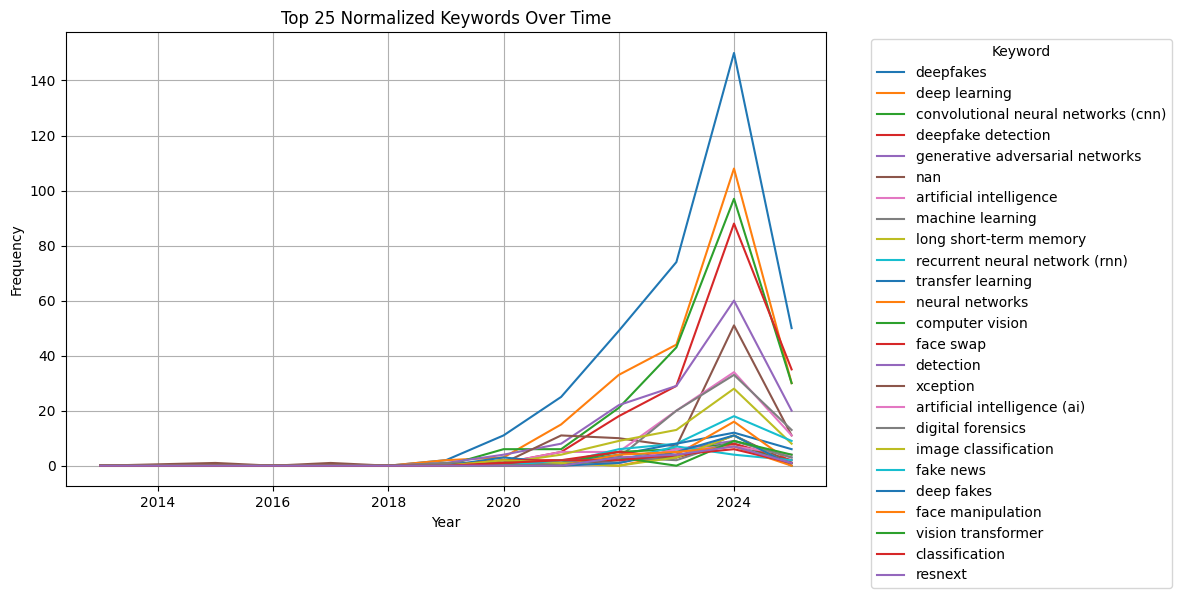

In [ ]:
singular_plural_map = {
    'deepfake': 'deepfakes',
    'gan': 'generative adversarial networks',
    'gans': 'generative adversarial networks',
    'generative adversarial network': 'generative adversarial networks',
    'generative adversarial networks (gan)': 'generative adversarial networks',
    'generative adversarial network (gan)': 'generative adversarial networks',
    'generative adversarial networks (gans)': 'generative adversarial networks',
    'deep fake': 'deepfakes',
    'deep-fake': 'deepfakes',
    'cnn': 'convolutional neural networks (cnn)',
    'convolutional neural network (cnn)': 'convolutional neural networks (cnn)',
    'convolutional neural networks (cnns)': 'convolutional neural networks (cnn)',
    'convolutional neural networks': 'convolutional neural networks (cnn)',
    'convolutional neural network': 'convolutional neural networks (cnn)',
    'convolution neural networks': 'convolutional neural networks (cnn)',
    'convolution neural network': 'convolutional neural networks (cnn)',
    'deep fake detection': 'deepfake detection',
    'face swapping': 'face swap',
    'faceswap': 'face swap',
    'lstm': 'long short-term memory',
    'long short-term memory (lstm)': 'long short-term memory',
    'long-short term memory (lstm)': 'long short-term memory',
    'recurrent neural network': 'recurrent neural network (rnn)',
    'rnn': 'recurrent neural network (rnn)',
    'ai': 'artificial intelligence (ai)',
    'artificial intelligence ': 'artificial intelligence (ai)',
}

#df = deepfake_rp_df.dropna(subset=["Year", "Author Keywords"])
df=deepfake_rp_df
# normalize
def normalize_keyword(kw):
    kw = kw.strip().lower()
    return singular_plural_map.get(kw, kw)

def extract_keywords(keyword_string):
    raw_keywords = str(keyword_string).split(';')
    return [normalize_keyword(k) for k in raw_keywords if k.strip()]

df["Normalized_Keywords"] = df["Author Keywords"].apply(extract_keywords)

# keywords count
keyword_counts_by_year = {}

for _, row in df.iterrows():
    year = int(row["Year"])
    keywords = row["Normalized_Keywords"]
    if year not in keyword_counts_by_year:
        keyword_counts_by_year[year] = Counter()
    keyword_counts_by_year[year].update(keywords)

all_keywords = set(k for year_data in keyword_counts_by_year.values() for k in year_data)
data = []

for year in sorted(keyword_counts_by_year.keys()):
    row = {"Year": year}
    for kw in all_keywords:
        row[kw] = keyword_counts_by_year[year][kw]
    data.append(row)

keyword_df = pd.DataFrame(data).fillna(0).set_index("Year")



top_n = 25
top_keywords = keyword_df.sum().sort_values(ascending=False).head(top_n).index

plt.figure(figsize=(12, 6))
for kw in top_keywords:
    sns.lineplot(data=keyword_df[kw], label=kw)

plt.title(f"Top {top_n} Normalized Keywords Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True);
plt.show();

The above graph shows the top 10 keywords that have been used and how their use have been changing over time, it can be noted that in 2024 almost all words showed inclied

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

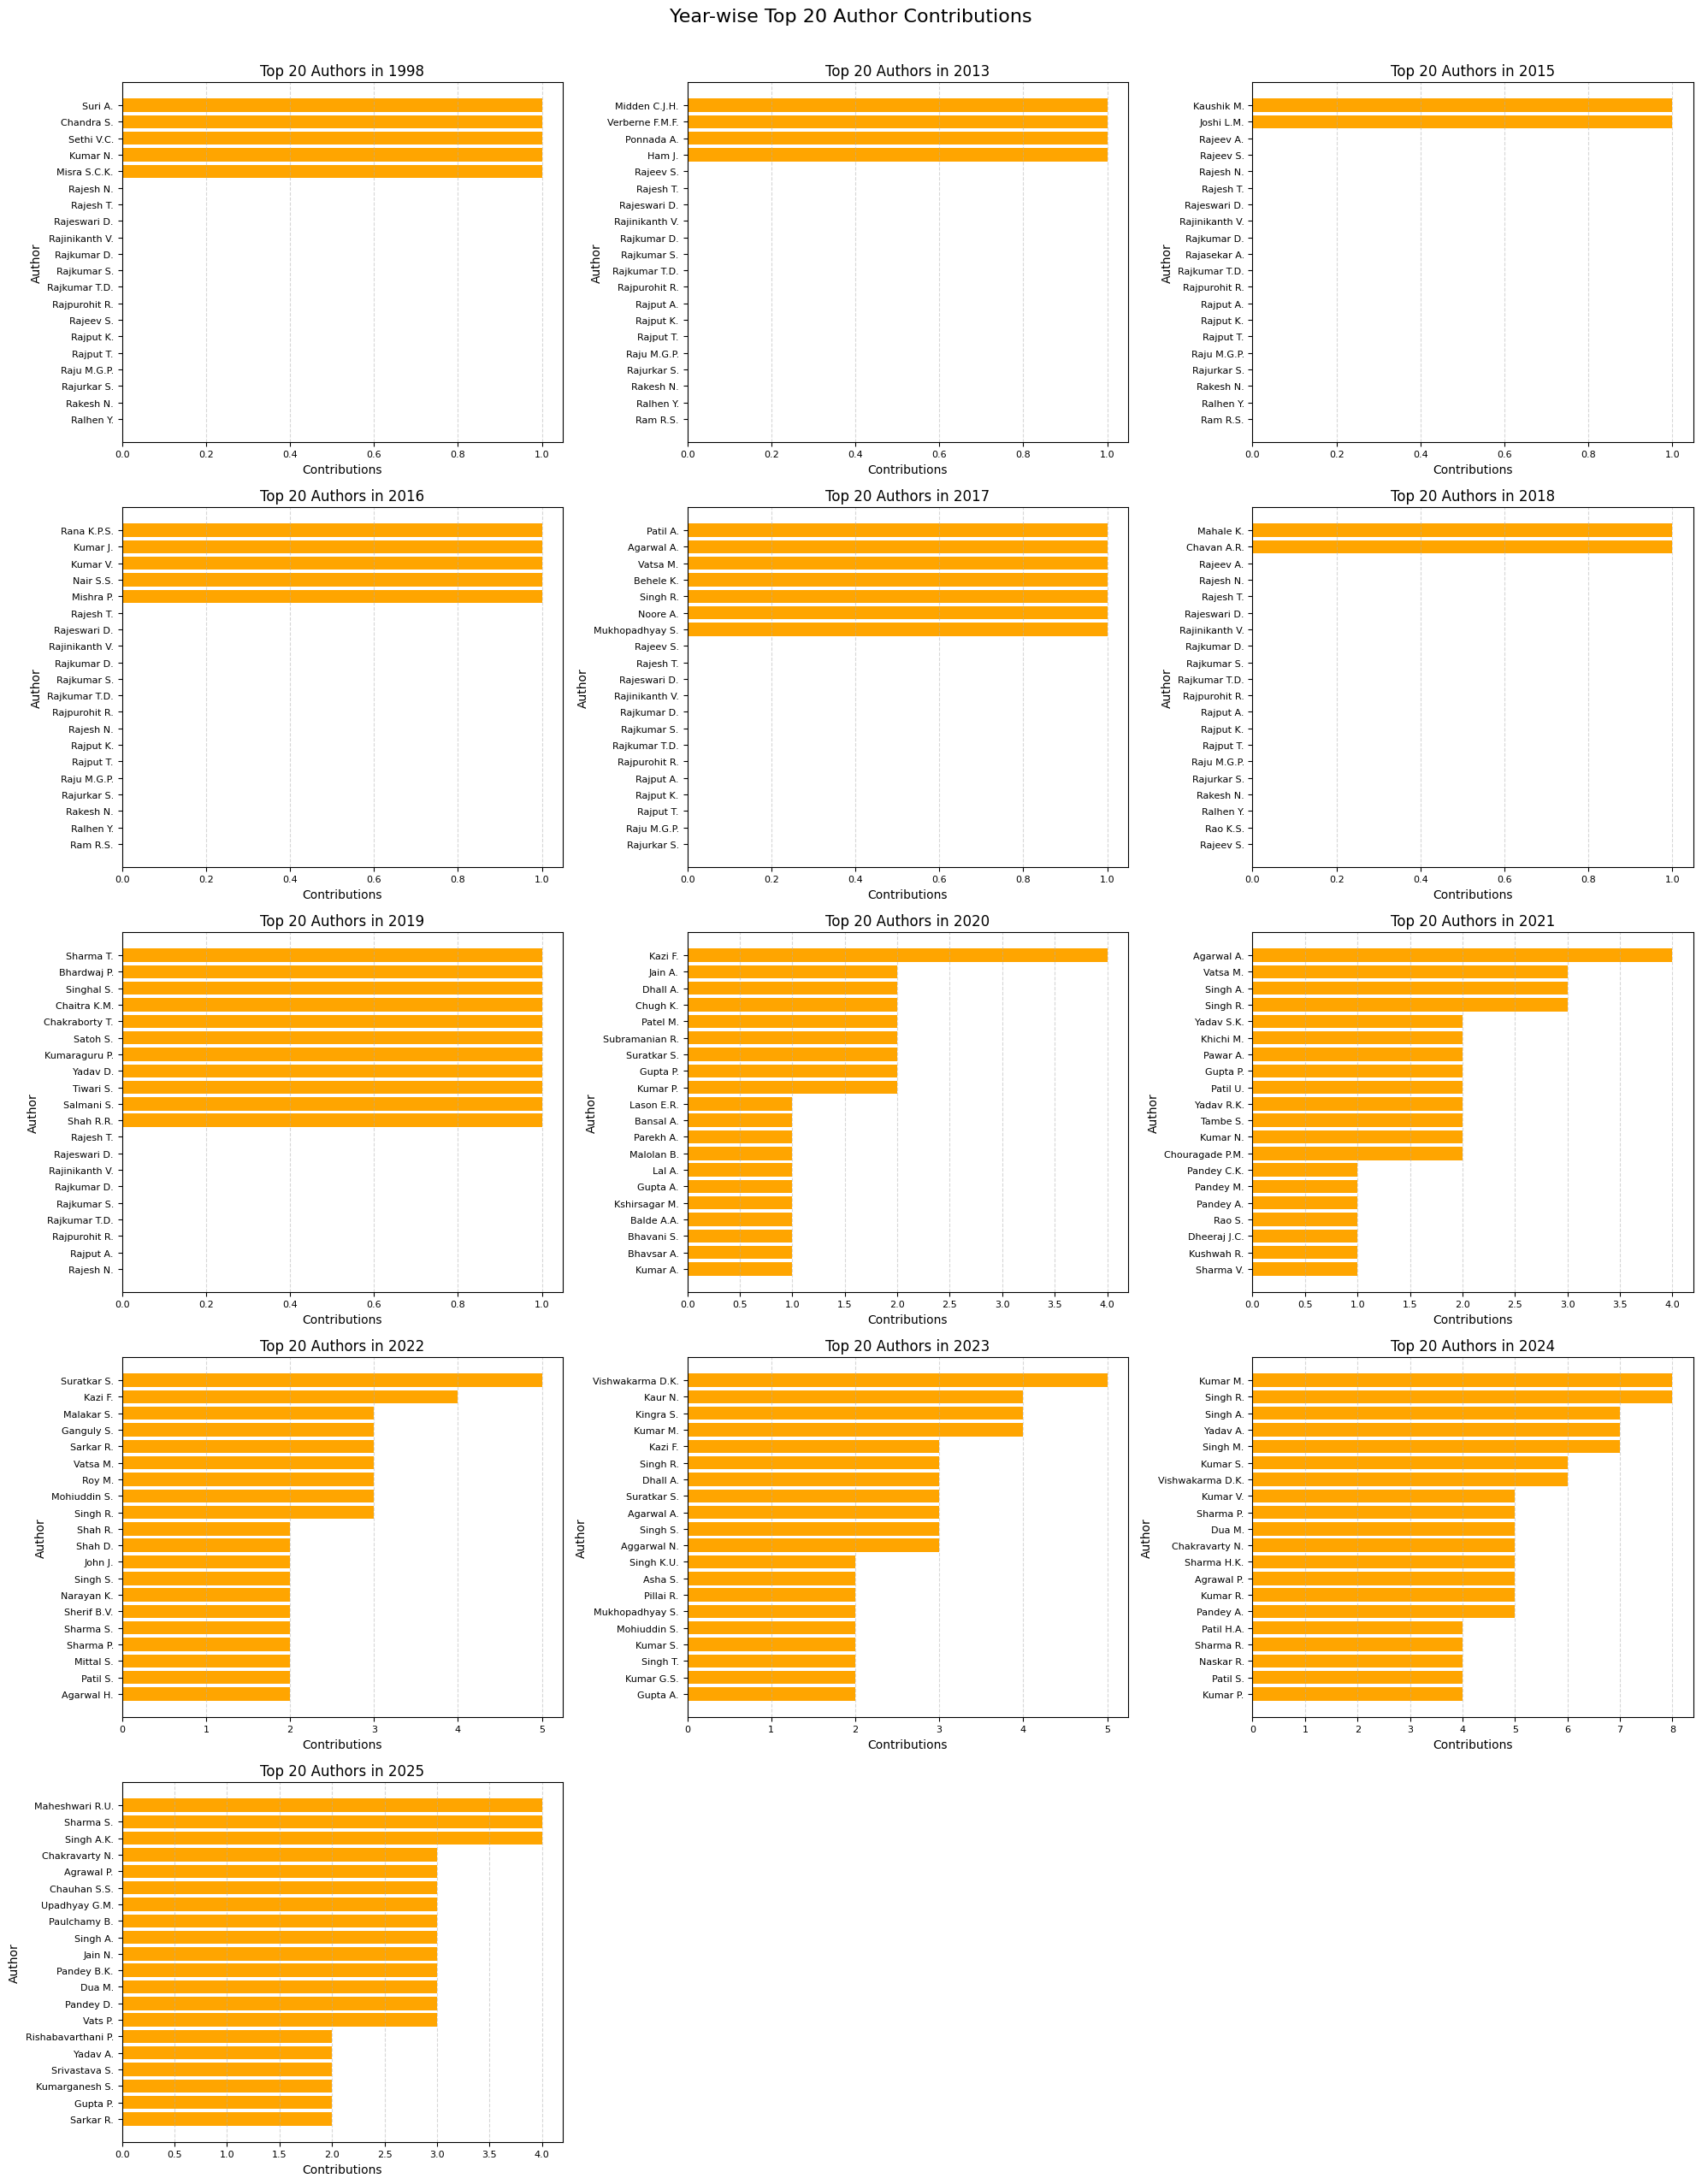

In [ ]:
# Clean up: ensure Year and Authors are present
deepfake_rp_df = deepfake_rp_df.dropna(subset=["Year", "Authors"])

# Parse authors (assuming they're separated by semicolon)
deepfake_rp_df["Author_List"] = deepfake_rp_df["Authors"].apply(
    lambda x: [a.strip() for a in str(x).split(';') if a.strip()]
)

# Step 1: Build a long-format DataFrame with (Year, Author)
author_year_data = []

for _, row in deepfake_rp_df.iterrows():
    year = int(row["Year"])
    for author in row["Author_List"]:
        author_year_data.append((year, author))

# Convert to DataFrame
contrib_df = pd.DataFrame(author_year_data, columns=["Year", "Author"])

# Pivot to get a year-author contribution matrix
year_author_matrix = contrib_df.groupby(["Year", "Author"]).size().unstack(fill_value=0)

# Step 2: Create bar plots for top 20 authors each year
years = sorted(year_author_matrix.index)
n_years = len(years)

ncols = 3
nrows = (n_years + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for idx, year in enumerate(years):
    top20 = year_author_matrix.loc[year].sort_values(ascending=False).head(20)
    axes[idx].barh(top20.index[::-1], top20.values[::-1], color='orange')
    axes[idx].set_title(f"Top 20 Authors in {year}", fontsize=12)
    axes[idx].set_xlabel("Contributions")
    axes[idx].set_ylabel("Author")
    axes[idx].tick_params(labelsize=8)
    axes[idx].grid(axis='x', linestyle='--', alpha=0.5)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Year-wise Top 20 Author Contributions", fontsize=16, y=1.02)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

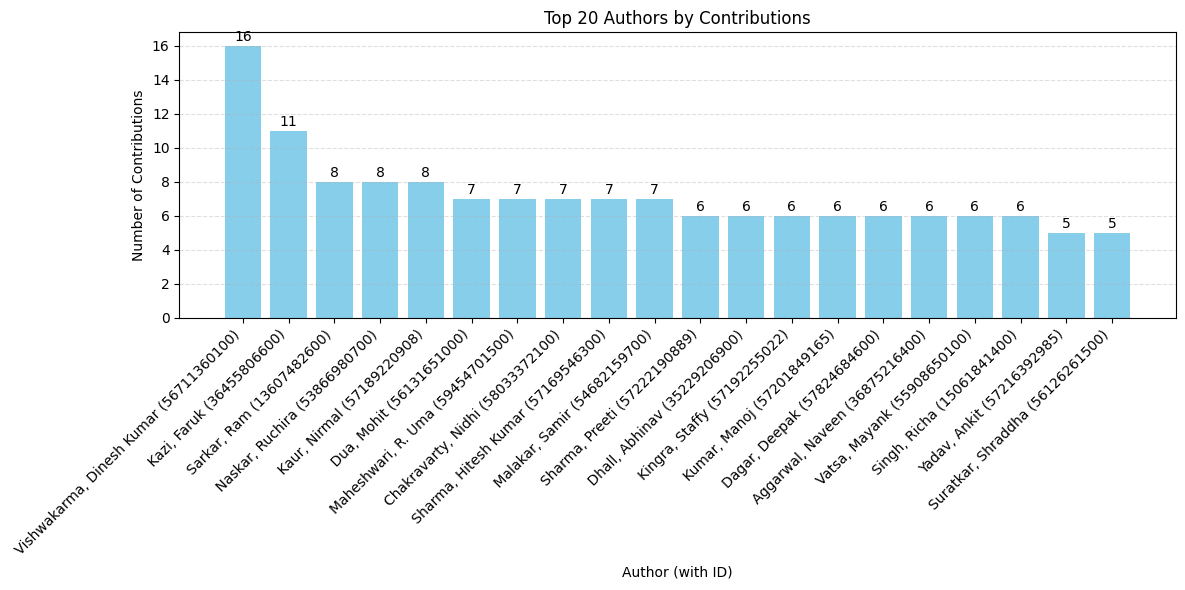

In [ ]:
import re
def extract_authors(author_str):
    if pd.isna(author_str):
        return []
    return re.findall(r'[^;]+?\(\d+\)', author_str)

# Flatten all authors into a single list
all_authors = df['Author full names'].dropna().apply(extract_authors).explode()

# Count occurrences
author_counts = Counter(all_authors)

# Convert to DataFrame and sort
author_df = pd.DataFrame(author_counts.items(), columns=['Author (ID)', 'Contributions'])
author_df = author_df.sort_values(by='Contributions', ascending=False)

# Plot top N authors
top_n = 20
top_authors = author_df.head(top_n)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_authors['Author (ID)'], top_authors['Contributions'], color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, str(height),
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Author (with ID)')
plt.ylabel('Number of Contributions')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.title(f'Top {top_n} Authors by Contributions')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total Unique Source Titles: 493
Country Journal Counts:
 Country
US                    117
SWITZERLAND            82
UK                     60
GERMANY                45
NETHERLANDS            22
INDIA                  20
INDONESIA               7
SINGAPORE               7
TURKEY                  6
FRANCE                  5
CROATIA                 3
POLAND                  3
PORTUGAL                2
BELGIUM                 1
PAKISTAN                1
UKRAINE                 1
IRELAND                 1
BRAZIL                  1
BAHRAIN                 1
SLOVENIA                1
UNITED STATES           1
AUSTRIA                 1
RUSSIAN FEDERATION      1
TAIWAN                  1
CHINA                   1
HONG KONG               1
LITHUANIA               1
Name: count, dtype: int64


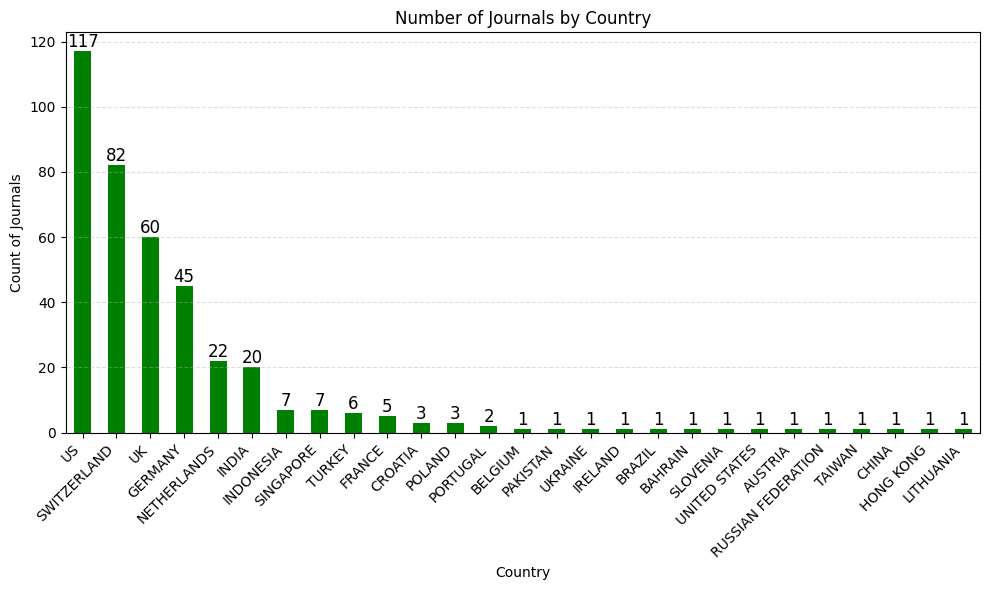

In [ ]:
filtered_df = deepfake_rp_df[deepfake_rp_df['Country'].notna() & (deepfake_rp_df['Country'] != 'NIL')]
unique_title = deepfake_rp_df['Source title'].nunique()
print("Total Unique Source Titles:", unique_title)

# journals per country
country_counts = filtered_df['Country'].value_counts()
print("Country Journal Counts:\n", country_counts)


plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')
for i, value in enumerate(country_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Journals by Country')
plt.xlabel('Country')
plt.ylabel('Count of Journals')
plt.xticks(rotation=45, ha ='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total unique values 4
Quartile Counts:
 Quartile
Q4    118
Q1     94
Q2     68
Q3     42
Name: count, dtype: int64


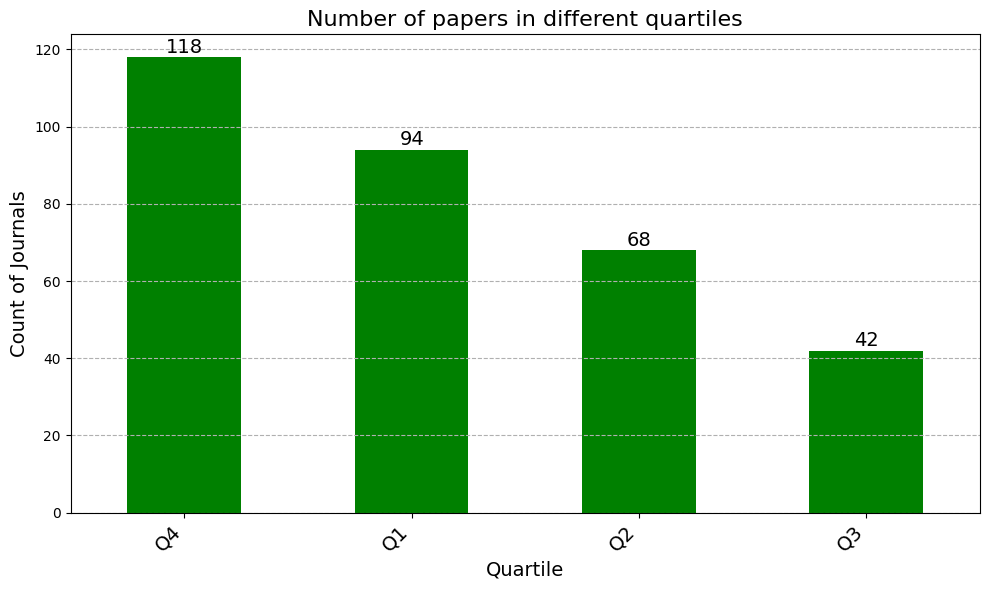

In [ ]:
# Filter out rows where Quartile is NaN, 'NIL', or '-'
filtered_df = deepfake_rp_df[
    deepfake_rp_df['Quartile'].notna() &
    (deepfake_rp_df['Quartile'] != 'NIL') &
    (deepfake_rp_df['Quartile'] != '-')
]

# Count unique quartile values
unique_values = filtered_df['Quartile'].nunique()
print("Total unique values", unique_values)

# Quartile value counts
quartile_counts = filtered_df['Quartile'].value_counts()
print("Quartile Counts:\n", quartile_counts)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
quartile_counts.plot(kind='bar', color='green')
for i, value in enumerate(quartile_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=14)
plt.title('Number of papers in different quartiles', fontsize=16)
plt.xlabel('Quartile',fontsize=14)
plt.ylabel('Count of Journals',fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


in q1 journals what was the reason of them being in the q1, was it keywords was it foreign colaboration


The h-index is a metric used in research to measure both the productivity and impact of a scientist's published work. It's calculated as the highest number 'h' such that a researcher has 'h' publications that have each been cited at least 'h' times. Essentially, an h-index of 10 means that a researcher has 10 papers, each cited at least 10 times.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

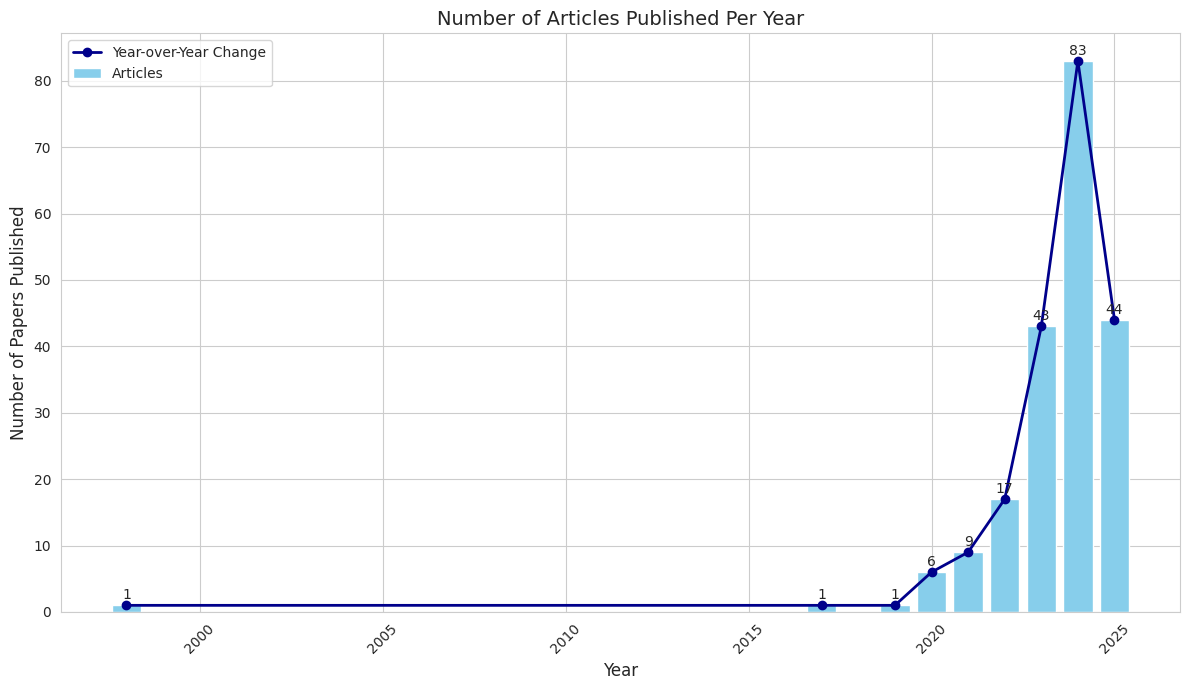

In [ ]:
sns.set_style("whitegrid")



# Filter articles and group by year
articles_df = deepfake_rp_df[deepfake_rp_df['Document Type'] == 'Article']
articles = articles_df.groupby('Year').size()

# Sort by year to avoid issues with trend line
articles = articles.sort_index()

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.bar(articles.index, articles.values, color='skyblue', label='Articles')

# Add data labels on top of bars
for x, y in zip(articles.index, articles.values):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

plt.plot(articles.index, articles.values, marker='o', color='darkblue', linewidth=2, label='Year-over-Year Change')


# Aesthetics
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Papers Published', fontsize=12)
plt.title('Number of Articles Published Per Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

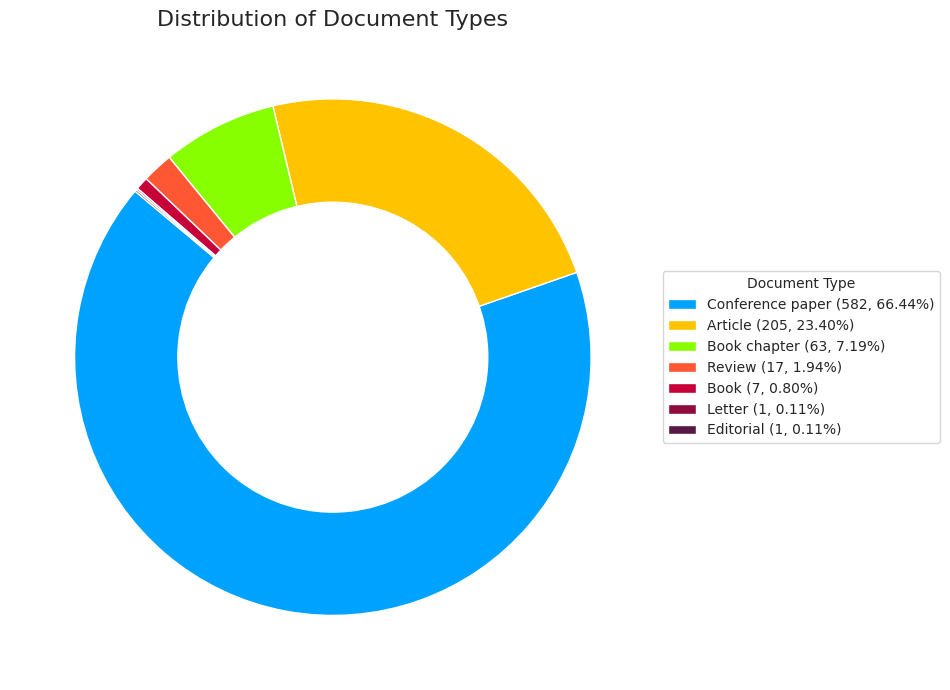

In [ ]:
# Filter and count
doc_df = deepfake_rp_df[deepfake_rp_df['Document Type'].isin(
    ['Article', 'Conference paper','Book', 'Book chapter', 'Editorial', 'Letter','Review'])]
Value_count = doc_df['Document Type'].value_counts()

# Plotting
plt.figure(figsize=(9, 7))


colors= ['#00a2ff', '#FFC300', '#87ff00','#FF5733','#C70039','#900C3F','#581845']
wedges, texts = plt.pie(
    Value_count,
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)

# Title and legend only (no overlapping labels)
plt.title('Distribution of Document Types', fontsize=16)
legend_labels = [f"{label} ({count}, {pct:.2f}%)" for label, count, pct in zip(
    Value_count.index,
    Value_count.values,
    100 * Value_count.values / Value_count.values.sum()
)]
plt.legend(wedges, legend_labels, title="Document Type", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

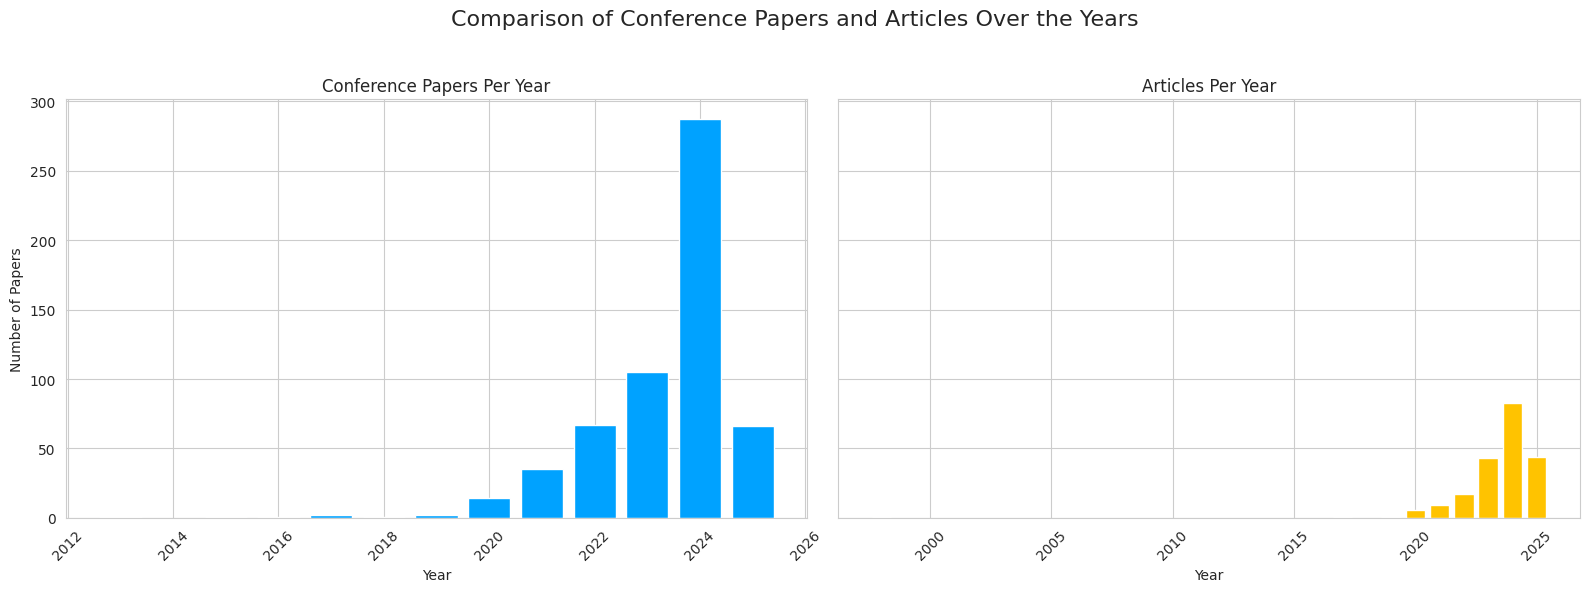

In [ ]:
# Filter data
conf_df = deepfake_rp_df[deepfake_rp_df['Document Type'] == 'Conference paper']
article_df = deepfake_rp_df[deepfake_rp_df['Document Type'] == 'Article']

# Group by year
conf_paper = conf_df.groupby('Year').size().sort_index()
article_paper = article_df.groupby('Year').size().sort_index()

# Plotting subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Conference Paper subplot
axes[0].bar(conf_paper.index, conf_paper.values, color='#00a2ff')
axes[0].set_title('Conference Papers Per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Papers')
axes[0].tick_params(axis='x', rotation=45)

# Article subplot
axes[1].bar(article_paper.index, article_paper.values, color='#FFC300')
axes[1].set_title('Articles Per Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=45)

# Layout and display
plt.suptitle('Comparison of Conference Papers and Articles Over the Years', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-43-310de18b2201>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')


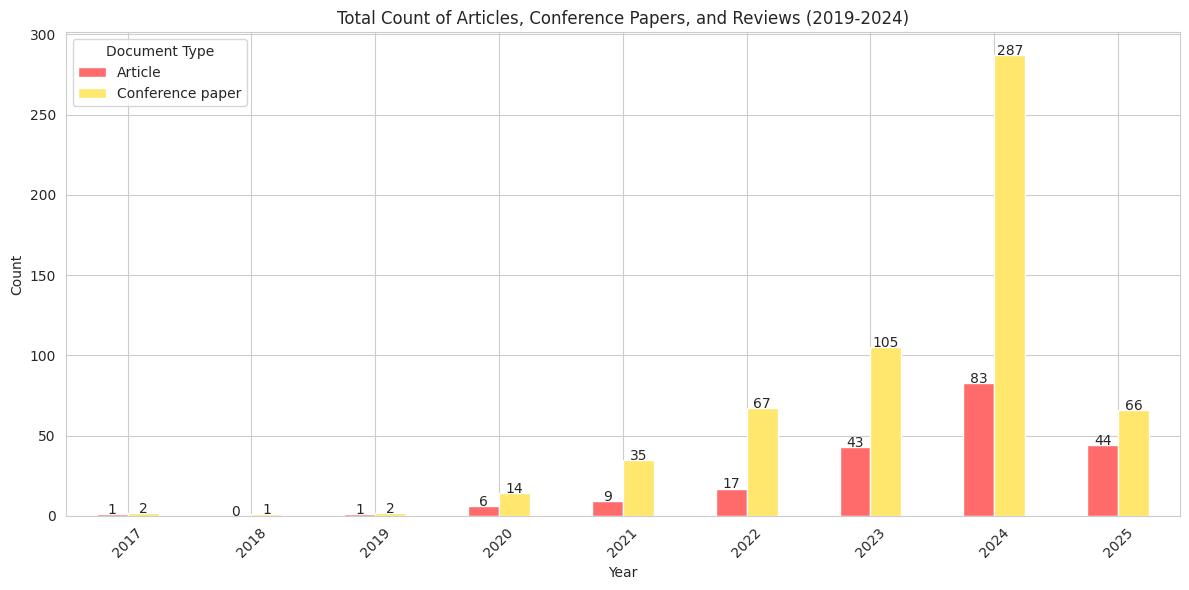

In [ ]:
filtered_df = deepfake_rp_df[deepfake_rp_df['Document Type'].isin(['Article', 'Conference paper'])]

filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')

filtered_df = filtered_df[filtered_df['Year'].between(2017, 2025, inclusive='both')]

grouped_data = filtered_df.groupby(['Year', 'Document Type']).size().unstack(fill_value=0)

totals = grouped_data

ax = totals.plot(kind='bar', figsize=(12, 6), color=['#ff6b6b','#ffe66d'])

# Add counts on bar
for i in ax.containers:
    for bar in i:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='center', xytext=(0, 3),
                    textcoords='offset points')

plt.title('Total Count of Articles, Conference Papers, and Reviews (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Document Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Function to extract probable countries
def extract_country_from_affiliation(affil_string):
    if pd.isna(affil_string):
        return []
    segments = affil_string.split(';')
    countries = []
    for segment in segments:
        parts = segment.strip().split(',')
        if parts:
            possible_country = parts[-1].strip().title()
            countries.append(possible_country)
    return countries

# Apply function
df['Extracted_Countries'] = df['Affiliations'].apply(extract_country_from_affiliation)

# Flatten and count
all_countries = [country for sublist in df['Extracted_Countries'] for country in sublist]
country_counts = Counter(all_countries)

# Convert to DataFrame
country_table = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)
print(country_table)


<IPython.core.display.Javascript object>

                                              Country  Count
0                                               India   1494
1                                       United States     43
6                                        Saudi Arabia     19
2                                United Arab Emirates     15
19                                             France     12
15                                          Australia     12
5                                            Malaysia      8
23                                              Japan      8
21                                          Singapore      7
3                                               China      7
10                                             Jordan      7
8                                      United Kingdom      7
22                                             Canada      7
17                                            Ireland      6
4                                              Taiwan      6
44                      

In [ ]:
#Open Acess vs non open acess



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

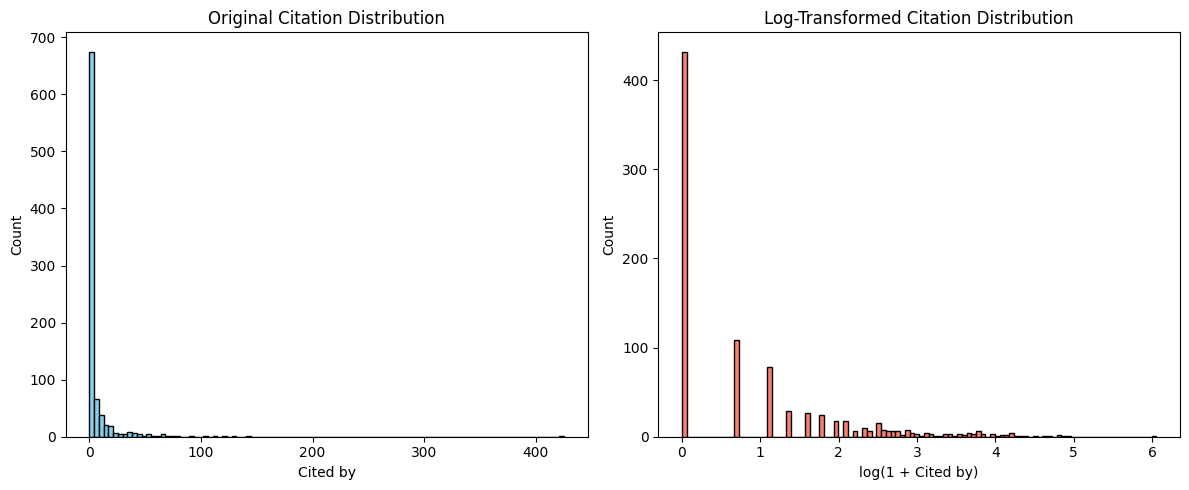

In [ ]:
# Apply log1p transformation
deepfake_rp_df['Cited_by_log'] = np.log1p(deepfake_rp_df['Cited by'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].hist(deepfake_rp_df['Cited by'], bins=100, color='skyblue', edgecolor='black')
axes[0].set_title("Original Citation Distribution")
axes[0].set_xlabel("Cited by")
axes[0].set_ylabel("Count")

# Log-transformed distribution
axes[1].hist(deepfake_rp_df['Cited_by_log'], bins=100, color='salmon', edgecolor='black')
axes[1].set_title("Log-Transformed Citation Distribution")
axes[1].set_xlabel("log(1 + Cited by)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

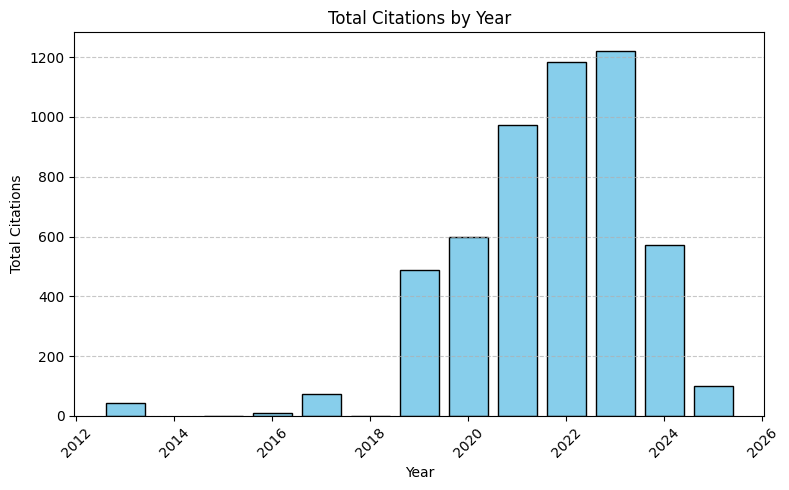

In [ ]:
yearly_citations = deepfake_rp_df.groupby('Year')['Cited by'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(yearly_citations['Year'], yearly_citations['Cited by'], color='skyblue', edgecolor='black')
plt.title("Total Citations by Year")
plt.xlabel("Year")
plt.ylabel("Total Citations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

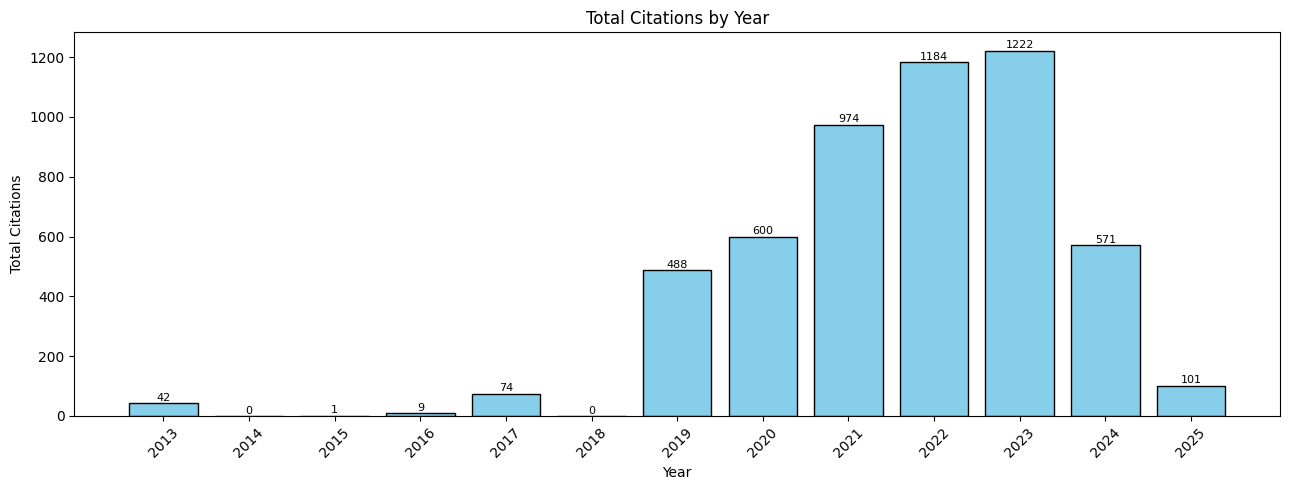

In [ ]:
all_years = np.arange(deepfake_rp_df['Year'].min(), deepfake_rp_df['Year'].max() + 1)
yearly_citations = deepfake_rp_df.groupby('Year')['Cited by'].sum().reindex(all_years, fill_value=0).reset_index()
yearly_citations.columns = ['Year', 'Cited by']

plt.figure(figsize=(13, 5))
bars = plt.bar(yearly_citations['Year'], yearly_citations['Cited by'], color='skyblue', edgecolor='black')
plt.title("Total Citations by Year")
plt.xlabel("Year")
plt.ylabel("Total Citations")
plt.xticks(yearly_citations['Year'], rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df = deepfake_rp_df
# df = df[df['Document Type'] == 'Article']
df = df.dropna(subset=['Cited by'])
Q1 = df['Cited by'].quantile(0.25)
Q3 = df['Cited by'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Cited by'] >= lower_bound) & (df['Cited by'] <= upper_bound)]
df.shape

<IPython.core.display.Javascript object>

(756, 46)

In [ ]:
df = df[
    deepfake_rp_df['Author Keywords'].notna() | deepfake_rp_df['Index Keywords'].notna()
]
df.shape
df['Cited by'].max()

<IPython.core.display.Javascript object>

<ipython-input-49-d882266f61dd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[


10

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import joblib

def clean_keyword(keyword):
    keyword = keyword.lower().strip()
    keyword = re.sub(r'[^\w\s]', '', keyword)
    keyword = re.sub(r'\s+', ' ', keyword)
    return keyword

# def load_and_preprocess_data(file_path):
#     df = pd.read_csv(file_path)
#     df = df[df['Document Type'] == 'Article']
#     print(f"\nNumber of articles after filtering: {len(df)}")
#     print("\nDataset Info:")
#     print(df.info())
#     print("\nFirst few rows:")
#     print(df.head())
#     return df

def process_keywords(keywords_series):
    all_keywords = []
    for keywords in keywords_series.dropna():
        keyword_list = [clean_keyword(k) for k in keywords.split(';')]
        all_keywords.extend(keyword_list)
    keyword_counter = Counter(all_keywords)
    top_keywords = [word for word, count in keyword_counter.most_common(20)]
    keyword_features = pd.DataFrame(index=keywords_series.index)
    for keyword in top_keywords:
        keyword_features[f'has_{keyword.replace(" ", "_")}'] = keywords_series.str.contains(
            keyword, case=False, na=False, regex=False
        ).astype(int)
    return keyword_features

def prepare_features(df):
    df_processed = df.copy()
    df_processed['author_count'] = df_processed['Authors'].str.count(';') + 1
    df_processed['Year'] = pd.to_numeric(df_processed['Year'], errors='coerce')
    df_processed['reference_count'] = df_processed['References'].str.count(';') + 1
    df_processed['reference_count'] = df_processed['reference_count'].fillna(0)
    df_processed['Page count'] = pd.to_numeric(df_processed['Page count'], errors='coerce')
    df_processed['is_open_access'] = df_processed['Open Access'].notna().astype(int)
    author_keyword_features = process_keywords(df_processed['Author Keywords'])
    index_keyword_features = process_keywords(df_processed['Index Keywords'])

    tfidf = TfidfVectorizer(max_features=20, stop_words='english')
    author_keywords_clean = df_processed['Author Keywords'].fillna('').apply(
        lambda x: ' '.join([clean_keyword(k) for k in x.split(';')])
    )
    author_keywords_tfidf = tfidf.fit_transform(author_keywords_clean)
    index_keywords_clean = df_processed['Index Keywords'].fillna('').apply(
        lambda x: ' '.join([clean_keyword(k) for k in x.split(';')])
    )
    index_keywords_tfidf = tfidf.fit_transform(index_keywords_clean)

    author_keywords_tfidf_df = pd.DataFrame(
        author_keywords_tfidf.toarray(),
        columns=[f'author_tfidf_{i}' for i in range(author_keywords_tfidf.shape[1])],
        index=df_processed.index
    )
    index_keywords_tfidf_df = pd.DataFrame(
        index_keywords_tfidf.toarray(),
        columns=[f'index_tfidf_{i}' for i in range(index_keywords_tfidf.shape[1])],
        index=df_processed.index
    )

    basic_features = ['Year', 'author_count', 'Page count', 'reference_count', 'is_open_access']
    for col in basic_features:
        if df_processed[col].isnull().any():
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())

    X_basic = df_processed[basic_features]
    X = pd.concat([
        X_basic,
        author_keyword_features,
        index_keyword_features,
        author_keywords_tfidf_df,
        index_keywords_tfidf_df
    ], axis=1)
    y = df_processed['Cited by']
    print("\nFeature Statistics:")
    print(X.describe())
    print("\nTop Author Keywords:")
    print(author_keyword_features.columns.tolist())
    print("\nTop Index Keywords:")
    print(index_keyword_features.columns.tolist())
    return X, y

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Detailed Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared Score: {r2:.2f}")

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
    }

def train_and_evaluate_models(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    print("\nTraining Random Forest...")
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    print(f"\nCross-validation R2 scores: {cv_scores}")
    print(f"Mean CV R2 score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    metrics = evaluate_model(y, y_pred, 'Random Forest')

    return {
        'Random Forest': {
            'model': model,
            'scaler': scaler,
            'metrics': metrics
        }
    }

def main():
    X, y = prepare_features(df)
    results = train_and_evaluate_models(X, y)

    joblib.dump(results['Random Forest']['model'], 'best_model.joblib')
    joblib.dump(results['Random Forest']['scaler'], 'scaler.joblib')

if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>


Feature Statistics:
              Year  author_count  Page count  reference_count  is_open_access  \
count   697.000000    697.000000  697.000000       697.000000      697.000000   
mean   2023.625538      3.832138    8.272597        29.014347        0.110473   
std       1.182527      1.548711    5.037247        24.216215        0.313704   
min    2015.000000      1.000000    1.000000         0.000000        0.000000   
25%    2023.000000      3.000000    6.000000        16.000000        0.000000   
50%    2024.000000      4.000000    7.000000        22.000000        0.000000   
75%    2024.000000      5.000000    8.000000        34.000000        0.000000   
max    2025.000000     10.000000   56.000000       215.000000        1.000000   

       has_deep_learning  has_deepfake  has_deepfake_detection  has_deepfakes  \
count         697.000000    697.000000              697.000000     697.000000   
mean            0.321377      0.659971                0.210904       0.139168   
std   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import joblib

def clean_keyword(keyword):
    keyword = keyword.lower().strip()
    keyword = re.sub(r'[^\w\s]', '', keyword)
    keyword = re.sub(r'\s+', ' ', keyword)
    return keyword

def process_keywords(keywords_series):
    all_keywords = []
    for keywords in keywords_series.dropna():
        keyword_list = [clean_keyword(k) for k in keywords.split(';')]
        all_keywords.extend(keyword_list)
    keyword_counter = Counter(all_keywords)
    top_keywords = [word for word, count in keyword_counter.most_common(20)]
    keyword_features = pd.DataFrame(index=keywords_series.index)
    for keyword in top_keywords:
        keyword_features[f'has_{keyword.replace(" ", "_")}'] = keywords_series.str.contains(
            keyword, case=False, na=False, regex=False
        ).astype(int)
    return keyword_features

def prepare_features(df):
    df_processed = df.copy()
    df_processed['author_count'] = df_processed['Authors'].str.count(';') + 1
    df_processed['Year'] = pd.to_numeric(df_processed['Year'], errors='coerce')
    df_processed['reference_count'] = df_processed['References'].str.count(';') + 1
    df_processed['reference_count'] = df_processed['reference_count'].fillna(0)
    df_processed['Page count'] = pd.to_numeric(df_processed['Page count'], errors='coerce')
    df_processed['is_open_access'] = df_processed['Open Access'].notna().astype(int)
    author_keyword_features = process_keywords(df_processed['Author Keywords'])
    index_keyword_features = process_keywords(df_processed['Index Keywords'])

    tfidf = TfidfVectorizer(max_features=20, stop_words='english')
    author_keywords_clean = df_processed['Author Keywords'].fillna('').apply(
        lambda x: ' '.join([clean_keyword(k) for k in x.split(';')])
    )
    author_keywords_tfidf = tfidf.fit_transform(author_keywords_clean)
    index_keywords_clean = df_processed['Index Keywords'].fillna('').apply(
        lambda x: ' '.join([clean_keyword(k) for k in x.split(';')])
    )
    index_keywords_tfidf = tfidf.fit_transform(index_keywords_clean)

    author_keywords_tfidf_df = pd.DataFrame(
        author_keywords_tfidf.toarray(),
        columns=[f'author_tfidf_{i}' for i in range(author_keywords_tfidf.shape[1])],
        index=df_processed.index
    )
    index_keywords_tfidf_df = pd.DataFrame(
        index_keywords_tfidf.toarray(),
        columns=[f'index_tfidf_{i}' for i in range(index_keywords_tfidf.shape[1])],
        index=df_processed.index
    )

    basic_features = ['Year', 'author_count', 'Page count', 'reference_count', 'is_open_access']
    for col in basic_features:
        if df_processed[col].isnull().any():
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())

    X_basic = df_processed[basic_features]
    X = pd.concat([
        X_basic,
        author_keyword_features,
        index_keyword_features,
        author_keywords_tfidf_df,
        index_keywords_tfidf_df
    ], axis=1)
    y = df_processed['Cited by']
    # print("\nFeature Statistics:")
    # print(X.describe())
    # print("\nTop Author Keywords:")
    # print(author_keyword_features.columns.tolist())
    # print("\nTop Index Keywords:")
    # print(index_keyword_features.columns.tolist())
    return X, y

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Detailed Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared Score: {r2:.2f}")

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
    }

def train_and_evaluate_models(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    print("\nTraining Random Forest...")
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    # print(f"\nCross-validation R2 scores: {cv_scores}")
    # print(f"Mean CV R2 score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    metrics = evaluate_model(y, y_pred, 'Random Forest')

    return {
        'Random Forest': {
            'model': model,
            'scaler': scaler,
            'metrics': metrics
        }
    }

def main():
    X, y = prepare_features(df)
    results = train_and_evaluate_models(X, y)

    joblib.dump(results['Random Forest']['model'], 'best_model.joblib')
    joblib.dump(results['Random Forest']['scaler'], 'scaler.joblib')

if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>


Training Random Forest...

Random Forest Detailed Metrics:
Mean Squared Error (MSE): 1.03
Root Mean Squared Error (RMSE): 1.02
Mean Absolute Error (MAE): 0.67
R-squared Score: 0.80


<IPython.core.display.Javascript object>

Training Random Forest...

Random Forest Metrics:
Mean Squared Error (MSE): 1.49
Root Mean Squared Error (RMSE): 1.22
Mean Absolute Error (MAE): 0.65
R-squared Score: 0.71


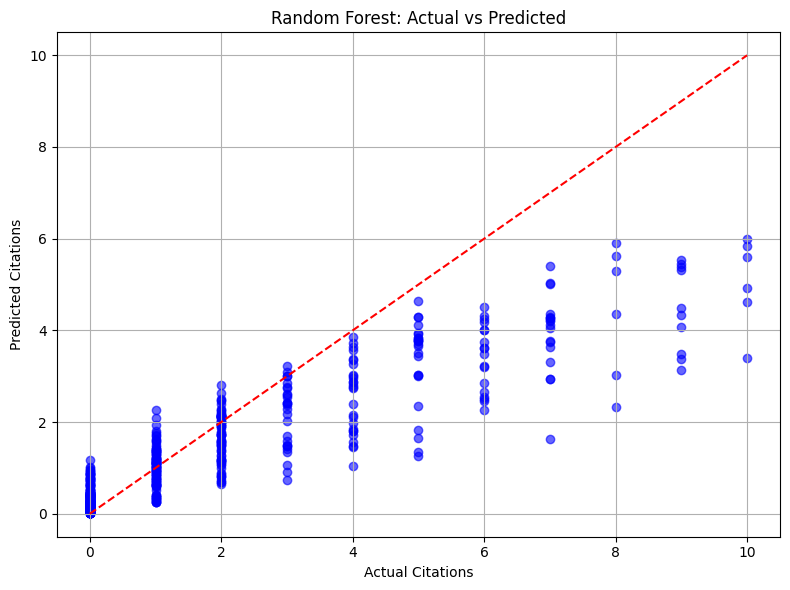


Predicted Citations for hardcoded input: 1.54


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import joblib

def clean_keyword(keyword):
    keyword = keyword.lower().strip()
    keyword = re.sub(r'[^\w\s]', '', keyword)
    keyword = re.sub(r'\s+', ' ', keyword)
    return keyword

def process_keywords(keywords_series):
    all_keywords = []
    for keywords in keywords_series.dropna():
        keyword_list = [clean_keyword(k) for k in keywords.split(';')]
        all_keywords.extend(keyword_list)
    keyword_counter = Counter(all_keywords)
    top_keywords = [word for word, count in keyword_counter.most_common(20)]
    keyword_features = pd.DataFrame(index=keywords_series.index)
    for keyword in top_keywords:
        keyword_features[f'has_{keyword.replace(" ", "_")}'] = keywords_series.str.contains(
            keyword, case=False, na=False, regex=False
        ).astype(int)
    return keyword_features

def prepare_features(df):
    df_processed = df.copy()
    df_processed['author_count'] = df_processed['Authors'].str.count(';') + 1
    df_processed['Year'] = pd.to_numeric(df_processed['Year'], errors='coerce')
    df_processed['reference_count'] = df_processed['References'].str.count(';') + 1
    df_processed['reference_count'] = df_processed['reference_count'].fillna(0)
    df_processed['Page count'] = pd.to_numeric(df_processed['Page count'], errors='coerce')
    df_processed['is_open_access'] = df_processed['Open Access'].notna().astype(int)

    author_keyword_features = process_keywords(df_processed['Author Keywords'])
    index_keyword_features = process_keywords(df_processed['Index Keywords'])

    tfidf = TfidfVectorizer(max_features=20, stop_words='english')
    author_keywords_clean = df_processed['Author Keywords'].fillna('').apply(
        lambda x: ' '.join([clean_keyword(k) for k in x.split(';')])
    )
    author_keywords_tfidf = tfidf.fit_transform(author_keywords_clean)
    joblib.dump(tfidf, 'author_tfidf_vectorizer.joblib')

    index_keywords_clean = df_processed['Index Keywords'].fillna('').apply(
        lambda x: ' '.join([clean_keyword(k) for k in x.split(';')])
    )
    index_keywords_tfidf = tfidf.fit_transform(index_keywords_clean)
    joblib.dump(tfidf, 'index_tfidf_vectorizer.joblib')

    author_keywords_tfidf_df = pd.DataFrame(
        author_keywords_tfidf.toarray(),
        columns=[f'author_tfidf_{i}' for i in range(author_keywords_tfidf.shape[1])],
        index=df_processed.index
    )
    index_keywords_tfidf_df = pd.DataFrame(
        index_keywords_tfidf.toarray(),
        columns=[f'index_tfidf_{i}' for i in range(index_keywords_tfidf.shape[1])],
        index=df_processed.index
    )

    basic_features = ['Year', 'author_count', 'Page count', 'reference_count', 'is_open_access']
    for col in basic_features:
        if df_processed[col].isnull().any():
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())

    X_basic = df_processed[basic_features]
    X = pd.concat([X_basic, author_keyword_features, index_keyword_features,
                   author_keywords_tfidf_df, index_keywords_tfidf_df], axis=1)

    # ✅ Apply log1p to target
    y = np.log1p(df_processed['Cited by'])
    joblib.dump(X.columns.tolist(), 'model_features.joblib')
    return X, y

def evaluate_model(y_true, y_pred_log, model_name):
    y_true_actual = np.expm1(y_true)
    y_pred_actual = np.expm1(y_pred_log)

    mse = mean_squared_error(y_true_actual, y_pred_actual)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_actual, y_pred_actual)
    r2 = r2_score(y_true_actual, y_pred_actual)

    print(f"\n{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared Score: {r2:.2f}")

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
    }

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='blue')
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([0, max_val], [0, max_val], 'r--')
    plt.xlabel("Actual Citations")
    plt.ylabel("Predicted Citations")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def train_and_evaluate_models(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    print("Training Random Forest...")
    model.fit(X_scaled, y)
    y_pred_log = model.predict(X_scaled)

    metrics = evaluate_model(y, y_pred_log, 'Random Forest')
    plot_actual_vs_predicted(y, y_pred_log, 'Random Forest')

    return {
        'Random Forest': {
            'model': model,
            'scaler': scaler,
            'metrics': metrics
        }
    }

def test_model_with_input():
  model = joblib.load('best_model.joblib')
  scaler = joblib.load('scaler.joblib')
  model_features = joblib.load('model_features.joblib')

  # Define your test input
  test_input = {
      'Year': 2022,
      'author_count': 3,
      'Page count': 10,
      'reference_count': 20,
      'is_open_access': 1,
      'has_deep_learning': 1,
      'has_neural_networks': 0,
      'has_machine_learning': 1,
      'has_big_data': 0,
      'has_classification': 0,
      'has_prediction': 0,
      'has_feature_selection': 0,
      'has_nlp': 0,
      'has_regression': 0,
      'has_data_mining': 0,
      'has_clustering': 0,
      'has_sentiment_analysis': 0,
      'has_text_mining': 0,
      'has_random_forest': 0,
      'has_support_vector_machine': 0,
      'has_image_processing': 0,
      'has_deep_neural_networks': 0,
      'has_topic_modeling': 0,
      'has_social_media': 0,
  }

  # Add TF-IDF dummy values (set to 0 for simplicity)
  for i in range(20):
      test_input[f'author_tfidf_{i}'] = 0
      test_input[f'index_tfidf_{i}'] = 0

  # ✅ Align feature order correctly
  full_input = pd.DataFrame([[test_input.get(f, 0) for f in model_features]], columns=model_features)

  # Scale and predict
  input_scaled = scaler.transform(full_input)
  pred_log = model.predict(input_scaled)
  pred_citations = np.expm1(pred_log)

  print(f"\nPredicted Citations for hardcoded input: {pred_citations[0]:.2f}")

def main():
    X, y = prepare_features(df)
    results = train_and_evaluate_models(X, y)
    joblib.dump(results['Random Forest']['model'], 'best_model.joblib')
    joblib.dump(results['Random Forest']['scaler'], 'scaler.joblib')
    test_model_with_input()

if __name__ == "__main__":
    main()
